# Example for calculating spherical-spheroidal inner-products
This example uses the `qnmobj` class to calculate inner-products. The advantage of using the class (rather than eg `positive.ysprod`) is that correct convention usage is promoted (and on some level assured).

In this notebook we will:
1. define a kerr black hole via its mass and spin; given this mass and spin, we will create a qnmobj instance; each member of the qnmobj class encapsulates many useful and manifestly self-consistent methods for black hole perturbation theory calculations
2. We will use `qnmobj.ysprod` to determine inner products 
3. Comute and plot inner-products for a range of BH spins

Note that
* spherical-spheroidal inner-products are invariant w.r.t. BH mass (if you change the mass the inner-products dont change)
* the inner-products sometimes need to be conjugated for your use -- this depends on the conventions at play. The `qnmobj` is made to be compatible with two convention types. See `qnmobj.explain_conventions()` for more information.

In [1]:
# Setup the notebook environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from matplotlib.pyplot import *
from numpy import *
from positive import *

(positive)>> Applying custom matplotlib settings.


In [2]:
# Print doc string for the qnmobj class
?qnmobj

Init signature: qnmobj(this, M, a, l, m, n, p=None, s=-2, verbose=False, calc_slm=True, calc_rlm=True, use_nr_convention=True, refine=False, num_xi=16384, num_theta=512, harmonic_norm_convention=None, amplitude=None, __DEVELOPMENT__=False)
Docstring:     
DESCRIPTION
---
Class for Kerr QNMs. Self-consistent handling of frequencies, and spheroidal harmonics under different conventions.

AUTHOR
---
londonl@mit.edu, pilondon2@gmail.com 2021
File:           ~/JOKI/Libs/KOALA/positive_dev/positive/physics.py
Type:           classobj


### Define a Kerr BH via its mass and spin ($ a = J/M = \chi*M$ )

In [3]:
M = 1
a = 0.7

### Create a qnmobj class instance using the standard perturbation theory convention. See `qnmobj.explain_conventions()` for more information.

In [6]:
# We are interested in the QNM with spheroidal indices l,m and n. 
l = 3
m = 2
n = 0

# Create the qnmobj for the (l,m,n) defined above. 
# Given this QNM object we can calculate the 
# inner-product between a spheroidal harmonic with 
# that (l,m,n), and a spherical harmonic with (lp,mp)
#
# NOTES:
# * We don't need the radial teukolsky function to calculate the inner-product, se we turn that off
# * By default the NR convention is used, so we turn that off here to use the perturbatino theory convention
# * We turn verbose mode on to lean about that the code is doing
#
foo = qnmobj(M,a,l,m,n,use_nr_convention=False,calc_rlm=False,verbose=True)

(__validate_inputs__)>> Not using NR convention for organizing solution space and setting the sign of the QNM freuency imaginary part.
(__leaver_helper__)>> NOT using NR convention for organizing solution space and setting the sign of the QNM freuency imaginary part.
(__leaver_helper__)>> Loading: /Users/book/JOKI/Libs/KOALA/positive_dev/positive/data/kerr/l3/n0l3m2.dat
(__leaver_helper__)>> Check Passed:Frequency and separation const. satisfy Leaver's equations with (l,m)=(3,2). Zero is approx 8.79e-08.
(test_slm)>> Check Passed: This object's spheroidal harmonic solves Teukolsky's angular equation with zero approximated by 2.26e-09.


### Compute the spherical spheroidal inner-product

For the $(\ell,m,n)=(3,2,0)$ QNM above, we want to compute, for example, the following inner-pproduct

$\langle Y_{22} | S_{320} \rangle = 2 \pi \int_{0}^{\pi} Y_{22}(\theta) S_{320}(\theta) \sin(\theta) \mathrm{d}\theta$

Above,  Y_{22}(\theta) is the theta part of the spherical harmonic, and that the full spherical harmonic is fiven by

$Y_{\ell m}(\theta,\phi) = e^{i m \phi} Y_{\ell m}(\theta)$

The same is true for the spheroidal harmonic

$S_{\ell m n}(\theta,\phi) = e^{i m \phi} S_{\ell m n}(\theta)$


Since $\int_{0}^{2\pi} e^{i m \phi} e^{i m' \phi} \mathrm{d}\phi = \delta_{m m'}$, we have that spherical-spheroidal inner-products with $m\neq m'$ are all zero.

In [17]:
??foo.ysprod

Signature: foo.ysprod(lj, mj)
Source:   
    def ysprod(this,lj,mj):
        
        #
        from numpy import pi,sqrt,sin
        from positive import sYlm
        
        #
        if not ('slm' in this.__dict__):
            this.calc_slm(__return__=False)
        
        #
        yj = sYlm(this.s,lj,mj,this.__theta__,this.__phi__)
        yj = yj / sqrt( prod(yj,yj,this.__theta__,WEIGHT_FUNCTION=2*pi*sin(this.__theta__)) )
        
        #
        ys = prod( yj, this.slm, this.__theta__,WEIGHT_FUNCTION=2*pi*sin(this.__theta__)) if mj == this.m else 0
        
        #
        return ys
File:      ~/JOKI/Libs/KOALA/positive_dev/positive/physics.py
Type:      instancemethod


In [11]:
# Define the spherical l and m of interest
spherical_l = 2
spherical_m = 2

# Compute the inner-product described above using the class function
print foo.ysprod( spherical_l, spherical_m )

(-0.0998492091417+0.0127005952021j)


In [12]:
# This is a relatively large number -- for this BH spin, about 10% of the 22-mode will apear in the 32 mode!
print abs(foo.ysprod( spherical_l, spherical_m ))

0.100653711728


### Compute the inner-product for a range of BH spins 

In [15]:
# Define some BH spins
a_range = linspace(0,0.99,60)

# Compute the same inner-product discussed above, but for different values of the BH spin
ys = array([ qnmobj(M,a_,l,m,n,use_nr_convention=False,calc_rlm=False,verbose=False).ysprod( spherical_l, spherical_m ) for a_ in a_range ])

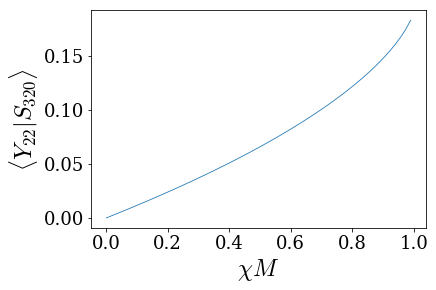

In [19]:
# Plot the absolute value
plot( a_range, abs(ys) )
xlabel(r'$\chi M$')
ylabel(r'$\langle Y_{22} | S_{320}  \rangle$');

### Print information about conventions for related reference

In [20]:
foo.explain_conventions()


# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(explain_conventions)>> General Explaination
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

Hi, this is an explaination of what the NR convention is for Black Hole(BH)
QuasiNormal Modes (QNMs). There are approximately two conventions used when
working with BH QNMs. They are the NR convention, and the Perturbation
Theory (PT) convention. 
        

# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(explain_conventions)>> Numerical Relativity Conventions
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #


        * QNM are defined by 4 numbers
        * the usual l,m,n, but also a number p which labels whether modes are prograde
            (p=1) or retrograde (p=-1).
        * The QNM frequencies are generally complex valued (ie complex omegas, thus the
            vairable name "cw"). The real part of the frequency, Re(cw), is the time domain 
            waveform's centra